In [5]:
# "Perceptron-learning.ipynb" by Dr. Konda Reddy Mopuri 
# is licensed under CC BY-NC 4.0 (https://creativecommons.org/licenses/by-nc/4.0/) 
# Author: Dr. Konda Reddy Mopuri
# Indian Institute of Technology Hyderabad
# Date: January 2023

In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Create data sampling from two Gaussian distributions

D1=torch.normal(0.0, 1.0,size=[100,2])
D2=torch.normal(3.0, 1.0,size=[100,2])

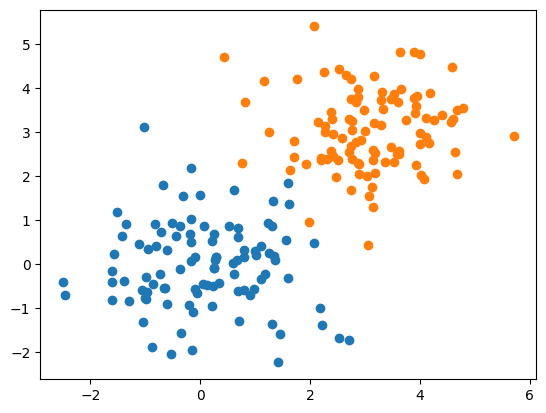

In [8]:
# plot the data

plt.scatter(D1[:,0], D1[:,1])
plt.scatter(D2[:,0], D2[:,1])

In [9]:
# Add the extra dimension (1) to data 

X=torch.empty(200,D1.size(1)+1).fill_(1)
X[::2,:2] = D1
X[1::2,:2] = D2
print(X.shape)
print(X)

# prepare the labels
Y=torch.empty(200,1)
Y[::2,:2] = 1.0
Y[1::2,:2] = -1.0
print(Y.shape)

torch.Size([200, 3])
tensor([[-2.5007e+00, -3.9414e-01,  1.0000e+00],
        [ 3.8863e+00,  3.7853e+00,  1.0000e+00],
        [-5.2106e-01,  9.4316e-01,  1.0000e+00],
        [ 1.2539e+00,  3.0005e+00,  1.0000e+00],
        [-9.4802e-01,  3.4783e-01,  1.0000e+00],
        [ 3.1594e+00,  3.2181e+00,  1.0000e+00],
        [-9.9708e-01, -7.7332e-01,  1.0000e+00],
        [ 2.2081e+00,  2.3654e+00,  1.0000e+00],
        [ 7.9550e-01,  3.2660e-01,  1.0000e+00],
        [ 2.8653e+00,  3.9804e+00,  1.0000e+00],
        [ 9.8217e-01, -5.6475e-01,  1.0000e+00],
        [ 3.7420e+00,  3.2819e+00,  1.0000e+00],
        [ 5.9189e-02, -4.3638e-01,  1.0000e+00],
        [ 3.6590e+00,  3.9907e+00,  1.0000e+00],
        [-1.4094e-01, -1.9357e+00,  1.0000e+00],
        [ 4.0049e+00,  4.7935e+00,  1.0000e+00],
        [-1.4201e+00,  6.4407e-01,  1.0000e+00],
        [ 4.1796e+00,  3.9066e+00,  1.0000e+00],
        [ 5.1860e-01,  8.7334e-01,  1.0000e+00],
        [ 4.1125e+00,  2.8898e+00,  1.0000e+00],

In [10]:
# Initialize W with all 0s
W = torch.zeros(X.size(1))

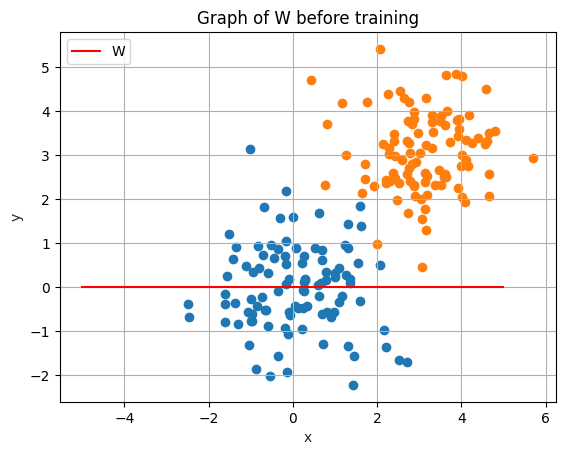

In [11]:
# plot the data and W before training

x = np.linspace(-5,5,100)
y = np.zeros(100,) 
plt.plot(x, y, '-r', label='W')
plt.title('Graph of W before training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.scatter(D1[:,0], D1[:,1])
plt.scatter(D2[:,0], D2[:,1])
plt.grid()
plt.show()

In [12]:
#The perceptron training algorithm

def train_perceptron(x, y, w, nb_epochs_max):  
  for e in range(nb_epochs_max):
    nb_changes = 0
    for i in range(x.size(0)):
      if x[i].dot(w) * y[i] <= 0:
        w = w + y[i] * x[i]
        nb_changes = nb_changes + 1
    #print('Number of changes: %d'%nb_changes) # prints the number of changes every epoch
    if nb_changes == 0:
        print('Early stopping at epoch number %d',e) 
        break;
  print('Number of changes: %d'%nb_changes)  # prints the number of chages in the end  
  return w

In [13]:
# Call the traning algorithm

W = train_perceptron(X,Y, W, 5)
print(W)

Number of changes: 9
tensor([-3.8955, -3.5653, 11.0000])


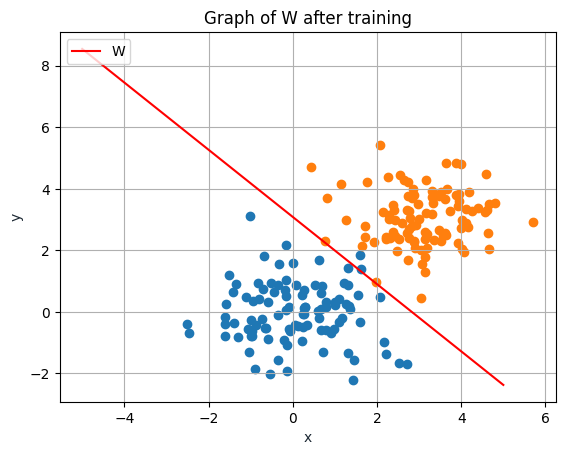

In [14]:
# Plot the data and W after training

x = np.linspace(-5,5,100)
y = -(W[0].item()/W[1].item())*x - (W[2].item()/W[1].item())
plt.plot(x, y, '-r', label='W')
plt.title('Graph of W after training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.scatter(D1[:,0], D1[:,1])
plt.scatter(D2[:,0], D2[:,1])
plt.grid()
plt.show()